
**Problem Statement**:

Detecting kyphosis disease at the early stage in children will prevent abnormal spinal vertebrae problems.
The problem that we are going to solve here is that given a set of features that describe the absence or presence of kyphosis, our machine learning model must predict whether the kyphosis is present or absent. To train our machine learning model with kyphosis data, we will be using  childen dataset [Kyphosis](https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv)

INPUTS:
- Age: in months
- Number: the number of vertebrae involved
- Start: the number of the first (topmost) vertebra operated on.

OUTPUT:
- Kyphosis: a factor with levels absent present indicating if a kyphosis (a type of deformation) was present after the operation




In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
df=pd.read_csv("https://raw.githubusercontent.com/Mounika-Kajjam/Datasets/master/kyphosis.csv")
df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [41]:
df.shape

(81, 4)

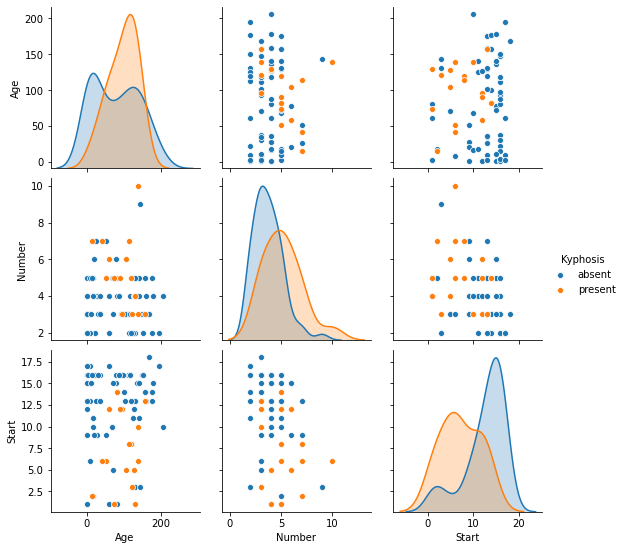

In [42]:
sns.pairplot(df,hue='Kyphosis')

In [43]:
## splitting the data set into input and output

X=df.drop('Kyphosis',axis=1)
y=df.Kyphosis

In [44]:
## Train-test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
## Apply the Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

## initilization of objects
dtree=DecisionTreeClassifier()

##applying the clasifier to the dataset
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [46]:
## predict on training data

y_train_pred=dtree.predict(X_train)
y_train_pred

array(['present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present', 'absent', 'present',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'absent', 'absent',
       'present', 'absent', 'absent', 'present'], dtype=object)

In [47]:
##classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [48]:
confusion_matrix(y_train,y_train_pred)

array([[51,  0],
       [ 0, 13]], dtype=int64)

In [49]:
## prediction on test data
y_test_pred=dtree.predict(X_test)

## compare the actual y_test values and y_test_pred values
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



[Text(334.80000000000007, 513.4, 'X[2] <= 12.5\ngini = 0.324\nsamples = 64\nvalue = [51, 13]'),
 Text(267.84000000000003, 453.0, 'X[0] <= 34.5\ngini = 0.499\nsamples = 27\nvalue = [14, 13]'),
 Text(133.92000000000002, 392.6, 'X[1] <= 6.0\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(66.96000000000001, 332.2, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(200.88000000000002, 332.2, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(401.76000000000005, 392.6, 'X[0] <= 141.0\ngini = 0.465\nsamples = 19\nvalue = [7, 12]'),
 Text(334.80000000000007, 332.2, 'X[1] <= 5.5\ngini = 0.415\nsamples = 17\nvalue = [5, 12]'),
 Text(267.84000000000003, 271.8, 'X[0] <= 83.5\ngini = 0.486\nsamples = 12\nvalue = [5, 7]'),
 Text(133.92000000000002, 211.39999999999998, 'X[0] <= 56.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(66.96000000000001, 151.0, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(200.88000000000002, 151.0, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(401.7600000000

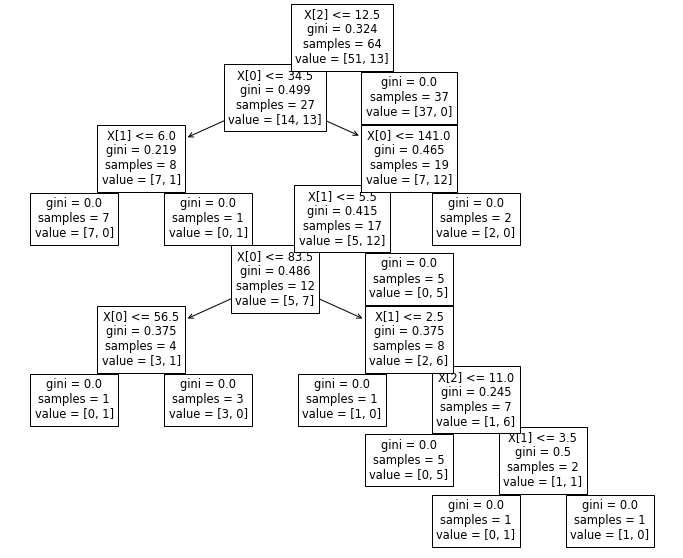

In [50]:
## visualization of the decision tree

from sklearn import tree
clf=tree.DecisionTreeClassifier(criterion='entropy')
plt.figure(figsize=(12,10))
tree.plot_tree(dtree)

In [51]:
## KFOLD CV:

from sklearn.model_selection import cross_val_score
cross_val_score(dtree,X_train,y_train,cv=5)

array([0.84615385, 0.92307692, 0.76923077, 0.92307692, 0.91666667])

### GridSearch CV

In [52]:
## hyper parameters
## Gridsearch-->find optimum parameters
grid_param={"criterion":['gini','entropy'],
            'max_depth' :range(2,32,1),
            'min_samples_leaf':range(1,10,1)}


In [53]:
from sklearn.model_selection import GridSearchCV

## intilization
grid_search=GridSearchCV(estimator=dtree,param_grid=grid_param,cv=5)

##applying gridsearch onto dataset
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 32),
                         'min_samples_leaf': range(1, 10)})

In [54]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 1}

In [55]:
## we have to build the model with best paramters
##initialze the DT clssifier

clf=DecisionTreeClassifier(criterion='gini', max_depth=8, min_samples_leaf=1)

## we need to fit the model of the data
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8)

In [56]:
## prediction on test data
pred_test=clf.predict(X_test)

## compare the actual y_test values and pred_test after grid search
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

      absent       0.79      0.85      0.81        13
     present       0.33      0.25      0.29         4

    accuracy                           0.71        17
   macro avg       0.56      0.55      0.55        17
weighted avg       0.68      0.71      0.69        17



## Random Forest Classification

In [62]:
## import the RFC from sklearn

from sklearn.ensemble import RandomForestClassifier

##initialize the object
rfc=RandomForestClassifier(n_estimators=40)

##fit
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=40)

In [65]:
##prediction on train data
##syntax:objname.ppredict(input_values)
y_pred_train=rfc.predict(X_train)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      absent       1.00      1.00      1.00        51
     present       1.00      1.00      1.00        13

    accuracy                           1.00        64
   macro avg       1.00      1.00      1.00        64
weighted avg       1.00      1.00      1.00        64



In [66]:
##prediction on test data
##syntax:objname.ppredict(input_values)
y_pred_test=rfc.predict(X_test)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      absent       0.73      0.85      0.79        13
     present       0.00      0.00      0.00         4

    accuracy                           0.65        17
   macro avg       0.37      0.42      0.39        17
weighted avg       0.56      0.65      0.60        17



In [82]:
## crossvalidation score
from sklearn.model_selection import cross_val_score
scores=cross_val_score(rfc,X_train,y_train,cv=5)
np.mean(scores)

0.8743589743589745

In [3]:
!pip install tensorflow